# 7장 시계열 데이터를 다뤄보자

## 7-1. Numpy의 polyfit으로 회귀(regression) 분석하기
* visual c++ build tools 설치
* pip install pystan
* pip install prophet
* pip install pandas_datareader
* conda install -c conda-forge fbprophet

In [32]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

* mateplotlib에서 한글 폰트 문제에 대한 코드 실행

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [38]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


* figsize:표의 크기
* grid:격자선의 유무

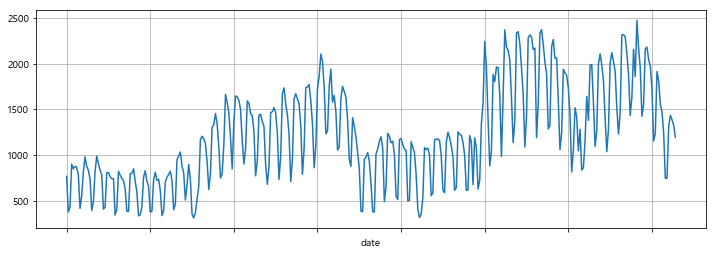

In [39]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

* time 이라는 시간축을 만들고 hit의 값을 traffic에 저장한다.
* np.arrange : 0부터 pinkwink_web의 길이까지 0.01 간격으로 데이터를 만든다.

In [42]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

* 어떤 데이터를 어떤 모델로 비교하기 위해서는 그 모델의 적합성을 확인하는 과정이 필요하다.
--> 참값과 비교해서 에러를 계산하기 위해 에러 함수를 정의한다.(평균 제곱근 오차)

In [44]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

* polyfit(x, y, 찾고자 하는 함수의 차수) //x에 대한 y의 함수를 ☆차식으로 나타낸다.

->결과값은 기울기와 절편
* poly1d : 수학적인 다항식으로 취급되며 함수끼리의 연산을 가능하게 해준다.
->poly1d([1,2,3,]) = $$ x^2  + 2x + 3 $$
* x와 y값에 대한 평균 제곱근 오차 출력

In [45]:
fp1 = np.polyfit(time, traffic, 1) 
f1 = np.poly1d(fp1) 

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777309328423


* 점 크기 10, 선 굵기 4
* legend : 라벨명 표시

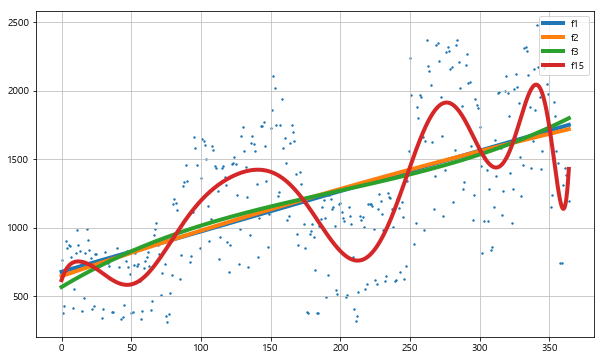

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=2)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=1)
plt.show()

## 7-2. Prophet 모듈을 이용한 forecast 예측

* pinkwink_web 변수에서 날짜(index)와 방문수(hit) 만 따로 저장한다.
* resest_index : 인덱스의 정렬
* 연단위 주기성

#### propet : 함수의 입력값(ds,y)의 열을 가진 dataFrame
ds는 data나 datatime을 반드시 포함해야 하고, y는 예측하고자 하는 값을 나타낸다.
* prophet 함수 사용 뒤에 fit메소드를 부른다. 부르고 나면 예측값이 df의 날짜에 맞춰 ds에 생성된다. make_future_dataframe을 사용해 지정된 날짜 수만큼 미래로 확장하는 적절한 df를 얻을 수 있다.

In [61]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [58]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
2960,2016-03-16
2961,2016-03-17
2962,2016-03-18
2963,2016-03-19
2964,2016-03-20


* predict 메소드는 각 열을 yhat 에 예측된 값인 future 에 나열한다.

In [59]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2960,2016-03-16,7.304931,6.696021,7.865427
2961,2016-03-17,7.293644,6.695102,7.900430
2962,2016-03-18,7.285682,6.683921,7.914257
2963,2016-03-19,7.015331,6.430125,7.637235
2964,2016-03-20,7.321111,6.750395,7.930521


* forecast : 예측값인 yhat 뿐만 아니라 구성요소와 신뢰구간을 포함하는 새로운 데이터프레임

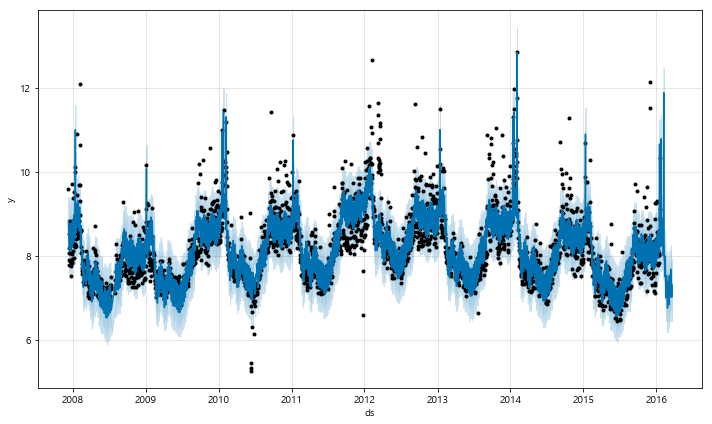

In [60]:
m.plot(forecast);

* plot_components : 예측 부분을 보고싶을때 사용

default값으로 연간 계절성과 주간 계절성 시계열 경향을 볼 수 있다.

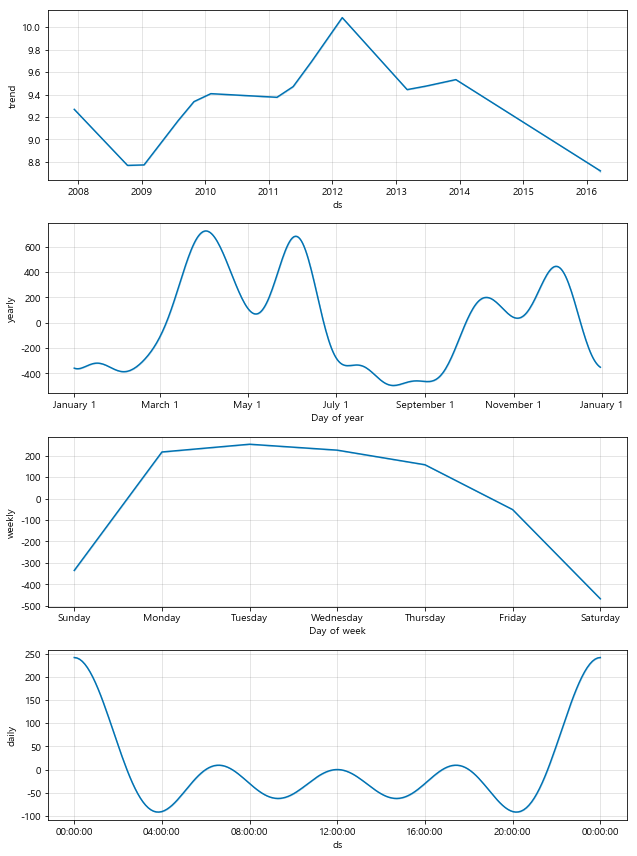

In [62]:
m.plot_components(forecast);

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [63]:
start = datetime(2003, 1, 1)
end   = datetime(2017, 6, 30)

KIA = web.DataReader('KRX:000270','google',start,end) 
KIA.head()

RemoteDataError: Unable to read URL: https://finance.google.com/finance/historical?q=KRX%3A000270&startdate=Jan+01%2C+2003&enddate=Jun+30%2C+2017&output=csv
Response Text:
b'<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style="text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%"><div style="border-bottom: 1px solid #dfdfdf;">Sorry...</div></td></tr></table></div><div style="margin-left: 4em;"><h1>We\'re sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users, we can\'t process your request right now.</p></div><div style="margin-left: 4em;">See <a href="https://support.google.com/websearch/answer/86640">Google Help</a> for more information.<br/><br/></div><div style="text-align: center; border-top: 1px solid #dfdfdf;"><a href="https://www.google.com">Google Home</a></div></body></html>'

In [64]:
KIA['Close'].plot(figsize=(12,6), grid=True);

NameError: name 'KIA' is not defined

In [65]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

NameError: name 'KIA' is not defined

In [66]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

NameError: name 'KIA_trunc' is not defined

In [67]:
m = Prophet(daily_seasonality=True)
m.fit(df);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [68]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
725,2018-06-26
726,2018-06-27
727,2018-06-28
728,2018-06-29
729,2018-06-30


In [69]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,2018-06-26,3139.089087,2715.847694,3574.514728
726,2018-06-27,3112.514347,2657.794131,3543.297063
727,2018-06-28,3045.531162,2610.246145,3511.104010
728,2018-06-29,2839.159687,2397.531976,3295.888204
729,2018-06-30,2436.598367,1986.514802,2868.429091


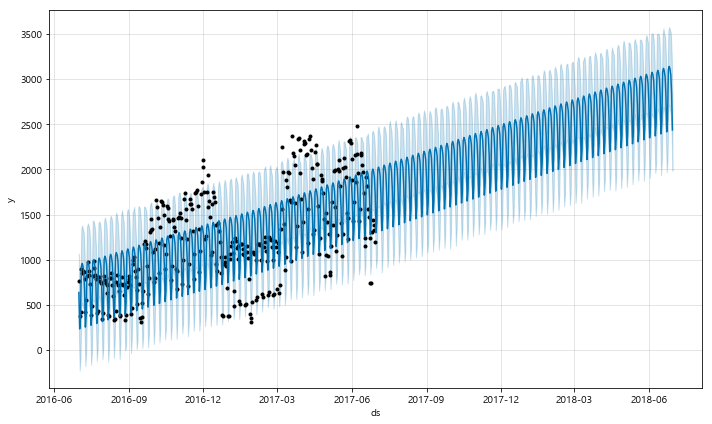

In [70]:
m.plot(forecast);

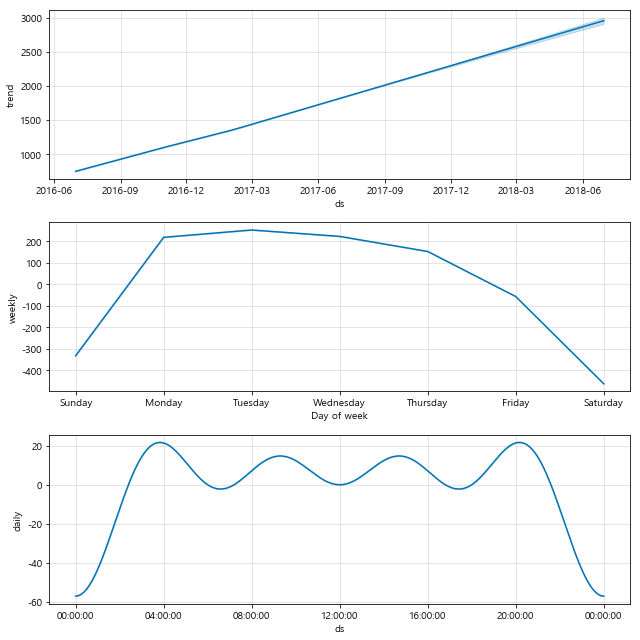

In [71]:
m.plot_components(forecast);

In [72]:
start = datetime(2014, 1, 1)
end   = datetime(2017, 7, 31)

KIA = web.DataReader('000270.KS','yahoo',start,end)
KIA['Close'].plot(figsize=(12,6), grid=True);

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [ ]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [ ]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [ ]:
future = m.make_future_dataframe(periods=61)
future.tail()

In [ ]:
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecast

In [17]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [18]:
df['cap'] = 8.5

In [19]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

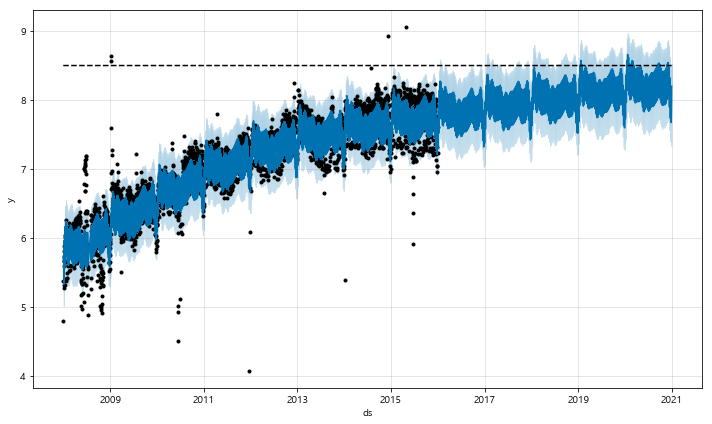

In [20]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

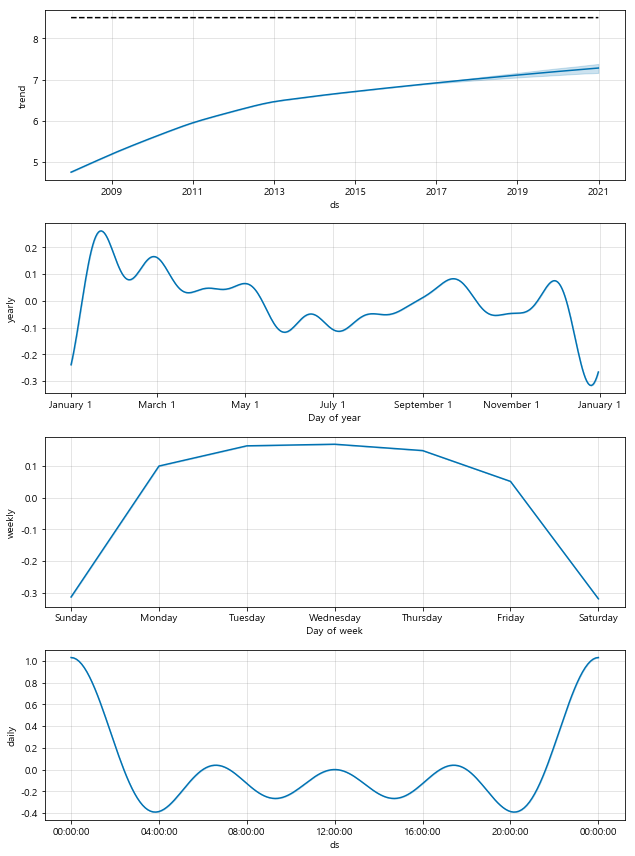

In [21]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [22]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

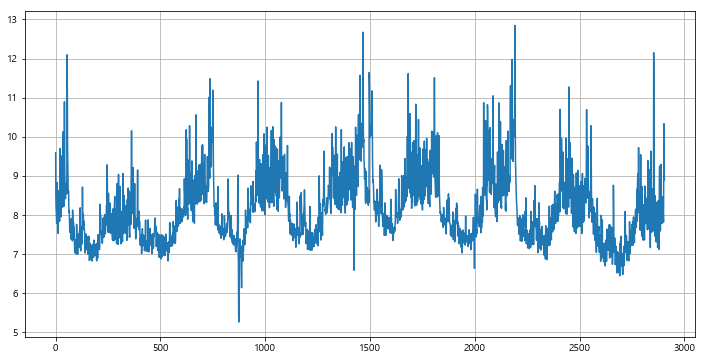

In [23]:
df.y.plot(figsize=(12,6), grid=True);

In [24]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [25]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [26]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.229359,1.192027
2191,2014-02-03,1.905656,1.459024
2532,2015-01-11,1.229359,0.000000
2533,2015-01-12,1.905656,0.000000
2901,2016-01-17,1.229359,0.000000
2902,2016-01-18,1.905656,0.000000
2908,2016-01-24,1.229359,0.000000
2909,2016-01-25,1.905656,0.000000
2922,2016-02-07,1.229359,1.192027
2923,2016-02-08,1.905656,1.459024


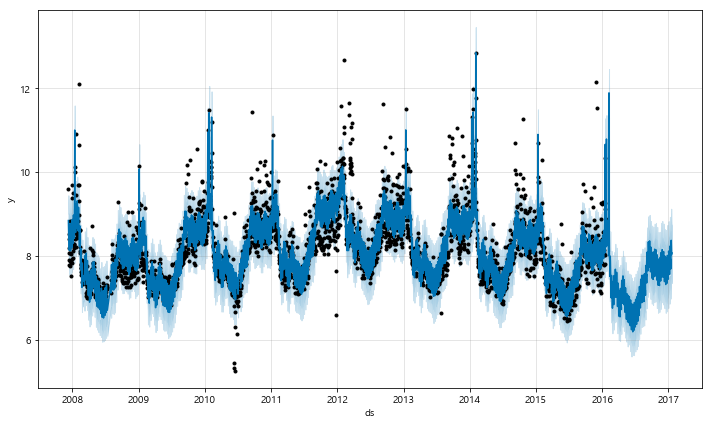

In [27]:
m.plot(forecast);

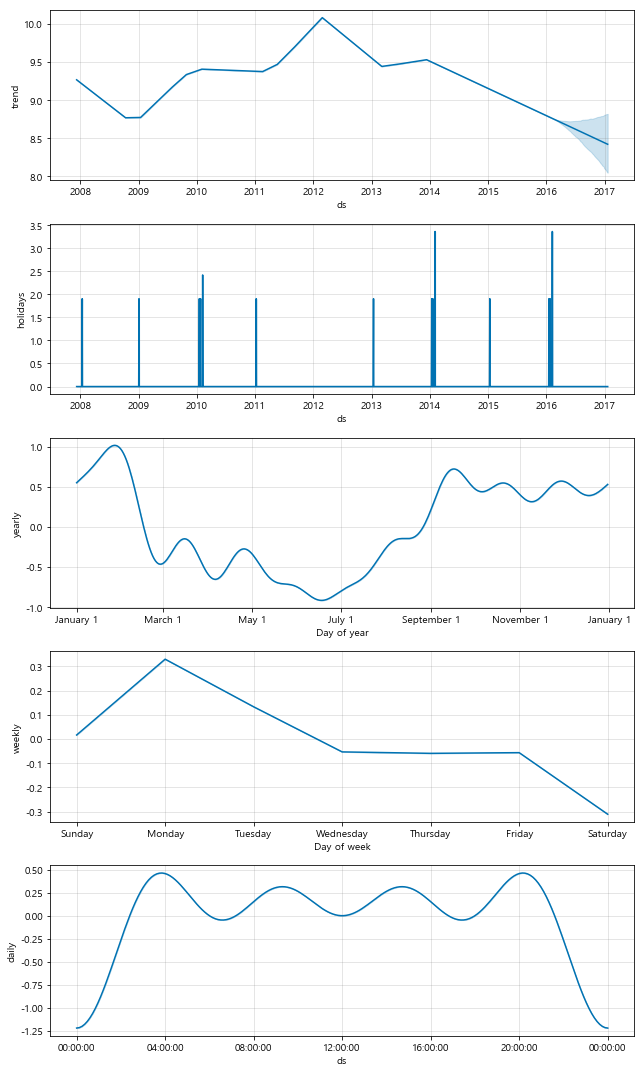

In [28]:
m.plot_components(forecast);